In [1]:
from typing_extensions import TypedDict
import random
from typing import Literal
from langgraph.graph import StateGraph, START, END

#### State

In [2]:
class State(TypedDict):
    graph_state: str

#### Nodes

In [3]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" Software Engineer!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" Computer Scientist!"}

#### Edges

In [4]:
def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

#### State Graph

In [5]:
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

In [6]:
# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

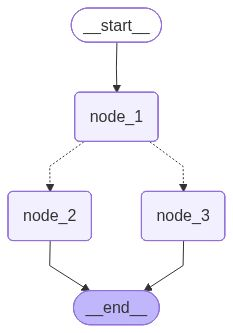

In [7]:
# Add
graph = builder.compile()
graph

In [8]:
graph.invoke({"graph_state" : "Hi, this is Kevin."})

---Node 1---
---Node 3---


{'graph_state': 'Hi, this is Kevin. I am Computer Scientist!'}

In [9]:
for _ in range(5):
    print(graph.invoke({"graph_state" : "Hi, this is Kevin."}))

---Node 1---
---Node 3---
{'graph_state': 'Hi, this is Kevin. I am Computer Scientist!'}
---Node 1---
---Node 2---
{'graph_state': 'Hi, this is Kevin. I am Software Engineer!'}
---Node 1---
---Node 2---
{'graph_state': 'Hi, this is Kevin. I am Software Engineer!'}
---Node 1---
---Node 3---
{'graph_state': 'Hi, this is Kevin. I am Computer Scientist!'}
---Node 1---
---Node 3---
{'graph_state': 'Hi, this is Kevin. I am Computer Scientist!'}
